In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
df=pd.read_csv('C:/Users/Ankan/Downloads/final_gc_anolomy.csv')

In [29]:
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)
df  = df[df['building_number']==1]
df.tail()

,timestamp,main_meter,sub_meter_1,sub_meter_2,building_number,weekend,corporate,main_meter_4,main_meter_12,day of week_0,day of week_1,day of week_2,day of week_3,day of week_4,day of week_5,day of week_6
6595,2017-12-31 19:00:00,2021.301929,957.024631,0.582683,1,1,1,5036.960165,4980.005262,0,0,0,0,0,0,1
6596,2017-12-31 20:00:00,1848.036869,719.780383,0.000000,1,1,0,1963.289479,4980.005262,0,0,0,0,0,0,1
6597,2017-12-31 21:00:00,1964.453574,742.286785,1.532929,1,1,0,1963.289479,4980.005262,0,0,0,0,0,0,1
6598,2017-12-31 22:00:00,1967.172923,841.157701,2.498131,1,1,0,1963.289479,4980.005262,0,0,0,0,0,0,1
6599,2017-12-31 23:00:00,2073.494552,862.065882,1.651296,1,1,0,1963.289479,4980.005262,0,0,0,0,0,0,1


In [30]:
df=df.drop(columns=['main_meter','sub_meter_1','building_number','weekend','corporate','main_meter_4','main_meter_12','day of week_0','day of week_1','day of week_2','day of week_3','day of week_4','day of week_5','day of week_6'])
df=df.set_index('timestamp')
df.head()

,sub_meter_2
timestamp,
2017-01-04 00:00:00,0.450666
2017-01-04 01:00:00,1.377337
2017-01-04 02:00:00,3.915958
2017-01-04 03:00:00,0.084493
2017-01-04 04:00:00,0.155445


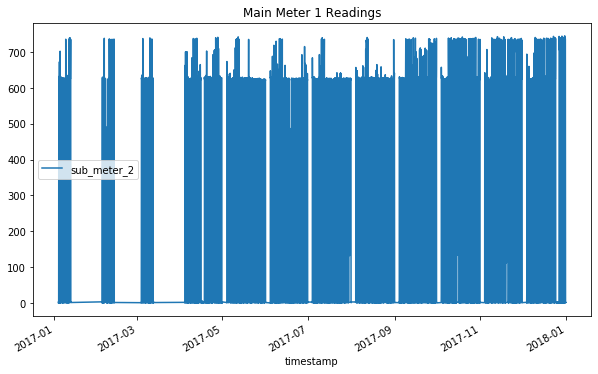

In [31]:
from plotly.offline import plot
import cufflinks as cf
df.plot(title="Main Meter 1 Readings", figsize=(10,6))

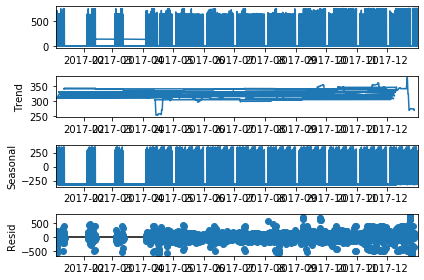

In [32]:
from chart_studio.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df, model='additive',period=168)
fig=result.plot()

In [33]:
from pmdarima import auto_arima
stepwise_model = auto_arima(df, start_p=1, start_q=1,
                           max_p=5, max_q=5,
                           start_P=0, seasonal=False,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Fit ARIMA: order=(1, 1, 1); AIC=85260.479, BIC=85287.658, Fit time=0.861 seconds
Fit ARIMA: order=(0, 1, 0); AIC=85538.749, BIC=85552.339, Fit time=0.000 seconds
Fit ARIMA: order=(1, 1, 0); AIC=85285.067, BIC=85305.451, Fit time=0.031 seconds
Fit ARIMA: order=(0, 1, 1); AIC=85262.012, BIC=85282.396, Fit time=0.016 seconds
Fit ARIMA: order=(2, 1, 1); AIC=84576.824, BIC=84610.797, Fit time=3.942 seconds
Fit ARIMA: order=(2, 1, 0); AIC=85261.374, BIC=85288.553, Fit time=0.046 seconds
Fit ARIMA: order=(2, 1, 2); AIC=84204.497, BIC=84245.265, Fit time=26.947 seconds
Fit ARIMA: order=(3, 1, 3); AIC=84049.349, BIC=84103.706, Fit time=15.291 seconds
Fit ARIMA: order=(2, 1, 3); AIC=84349.499, BIC=84397.062, Fit time=5.983 seconds
Fit ARIMA: order=(4, 1, 3); AIC=83870.139, BIC=83931.291, Fit time=37.788 seconds
Fit ARIMA: order=(4, 1, 2); AIC=84345.142, BIC=84399.499, Fit time=10.477 seconds
Fit ARIMA: order=(4, 1, 4); AIC=83752.646, BIC=83820.592, Fit time=145.973 seconds
Fit ARIMA: order=(5, 1

In [34]:
train = df.loc['01-04-2017 00:00:00':'07-11-2017 00:00:00']
test = df.loc['07-11-2017 00:00:00':]
stepwise_model.fit(train)

ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(3, 1, 5),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend=None, with_intercept=True)

In [35]:
future_forecast = stepwise_model.predict(n_periods=1320)
future_forecast

array([ 53.29842701,  34.91259068,  98.00203561, ..., 186.69523858,
       154.36098605,  84.03986631])

In [36]:
a=pd.DataFrame(data=future_forecast)
a.to_csv('updatedb1m3.csv')

# add the code to show actual vs predicted
